In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq

In [25]:
# Đường dẫn đến file CSV
file_path = r'C:\Users\MACH TRONG HAI\Downloads\AIOT\Thu Data\Stop_Breathing.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path)

# Xử lý dữ liệu
dataSet = df[["aX", "aY", "aZ", "gX", "gY", "gZ"]]

# Hiển thị dữ liệu đã chọn
print("\nDữ liệu đã chọn:")
print(dataSet.head())


Dữ liệu đã chọn:
      aX    aY    aZ      gX     gY     gZ
0  -0.06  0.13  0.97    3.02  -1.91   -0.6
1  -0.08  0.18  0.99    7.71  -2.76   0.76
2  -0.07   0.2  0.99    6.25  -1.08   0.32
3  -0.07  0.23   1.0   -0.44   -0.6   0.64
4  -0.06  0.19  0.99  -12.36  -1.51  -2.06


In [26]:
def compute_fourier_transform(data, fs):
    # Loại bỏ thành phần DC
    mean_value = np.mean(data)
    data -= mean_value

    # Số lượng mẫu
    SAMPLES = len(data)

    # Tính toán phần thực và phần ảo của biến đổi Fourier
    real_part = np.zeros(SAMPLES)
    imag_part = np.zeros(SAMPLES)

    for k in range(SAMPLES):
        for n in range(SAMPLES):
            real_part[k] += data[n] * np.cos(2 * np.pi * n * k / SAMPLES)
            imag_part[k] -= data[n] * np.sin(2 * np.pi * n * k / SAMPLES)

    # Tính toán biên độ và tần số
    frequencies = np.fft.fftfreq(SAMPLES, 1 / fs)
    magnitudes = np.sqrt(real_part**2 + imag_part**2)

    # Chỉ lấy nửa đầu của phổ tần số và biên độ
    half_spectrum = SAMPLES // 2
    frequencies = frequencies[:half_spectrum]
    magnitudes = magnitudes[:half_spectrum]

    return frequencies

In [27]:
# Thông số bộ lọc thông thấp
fc_low = 0.5  # Tần số cắt của bộ lọc thông thấp (Hz)
w0_low = 2 * np.pi * fc_low

# Số lượng mẫu và tần số lấy mẫu
fs = 40.0  # Tần số lấy mẫu (Hz)

# Tạo bộ lọc thông thấp
num_low = [w0_low]    # Hệ số tử
den_low = [1, w0_low] # Hệ số mẫu số
lowPass = signal.TransferFunction(num_low, den_low)

# Chuyển đổi sang dạng rời rạc
dt = 1.0 / fs  # Khoảng thời gian giữa các mẫu
discreteLowPass = lowPass.to_discrete(dt, method='gbt', alpha=0.5)

# Hiển thị các hệ số của bộ lọc thông thấp rời rạc
b_low = discreteLowPass.num
a_low = discreteLowPass.den

print("Hệ số tử số (b) của bộ lọc thông thấp:", b_low)
print("Hệ số mẫu số (a) của bộ lọc thông thấp:", a_low)

Hệ số tử số (b) của bộ lọc thông thấp: [0.03778605 0.03778605]
Hệ số mẫu số (a) của bộ lọc thông thấp: [ 1.         -0.92442789]


In [28]:
# Lọc dữ liệu bằng bộ lọc thông thấp 
def apply_low_pass_filter(data, b, a):
    y_low_pass = np.zeros(len(data))
    for i in range(1, len(data)):
        y_low_pass[i] = b[0] * data[i] + b[1] * data[i-1] - a[1] * y_low_pass[i-1]
    return y_low_pass

Frequencies (aZ): [0.00000000e+00 1.00025006e-02 2.00050013e-02 ... 1.99649912e+01
 1.99749937e+01 1.99849962e+01]


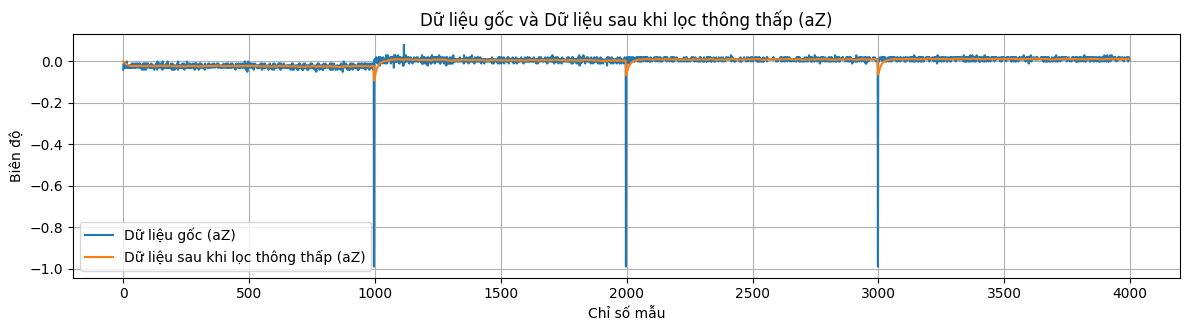

In [29]:
# Chuyển đổi dữ liệu thành mảng NumPy và lấy mẫu
aZ_filtered = pd.to_numeric(df['aZ'], errors='coerce').values
aZ_filtered = np.nan_to_num(aZ_filtered)
aZ_filtered = aZ_filtered[-3999:]

# Tính toán biến đổi Fourier 
frequencies_z= compute_fourier_transform(aZ_filtered, fs)

# In kết quả để kiểm tra
print("Frequencies (aZ):", frequencies_z)

# Lọc dữ liệu cho cả aZ 
y_low_pass_z = apply_low_pass_filter(aZ_filtered, b_low, a_low)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu gốc và dữ liệu sau khi lọc cho aZ
plt.subplot(2, 1, 1)
plt.plot(aZ_filtered, label='Dữ liệu gốc (aZ)')
plt.plot(y_low_pass_z, label='Dữ liệu sau khi lọc thông thấp (aZ)')
plt.title('Dữ liệu gốc và Dữ liệu sau khi lọc thông thấp (aZ)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Frequencies (aY): [0.00000000e+00 1.00025006e-02 2.00050013e-02 ... 1.99649912e+01
 1.99749937e+01 1.99849962e+01]


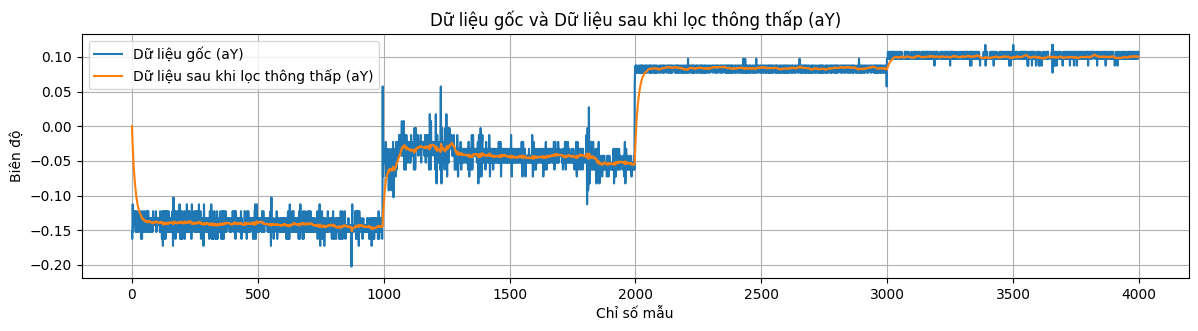

In [30]:
# Chuyển đổi dữ liệu thành mảng NumPy và lấy mẫu
aY_filtered = pd.to_numeric(df['aY'], errors='coerce').values
aY_filtered = np.nan_to_num(aY_filtered)
aY_filtered = aY_filtered[-3999:]


# Tính toán biến đổi Fourier 
frequencies_y= compute_fourier_transform(aY_filtered, fs)
# frequencies_x= compute_fourier_transform(aX_filtered, fs)

# In kết quả để kiểm tra
print("Frequencies (aY):", frequencies_y)

# Lọc dữ liệu cho aY
y_low_pass_y = apply_low_pass_filter(aY_filtered, b_low, a_low)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu gốc và dữ liệu sau khi lọc cho aY
plt.subplot(2, 1, 2)
plt.plot(aY_filtered, label='Dữ liệu gốc (aY)')
plt.plot(y_low_pass_y, label='Dữ liệu sau khi lọc thông thấp (aY)')
plt.title('Dữ liệu gốc và Dữ liệu sau khi lọc thông thấp (aY)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

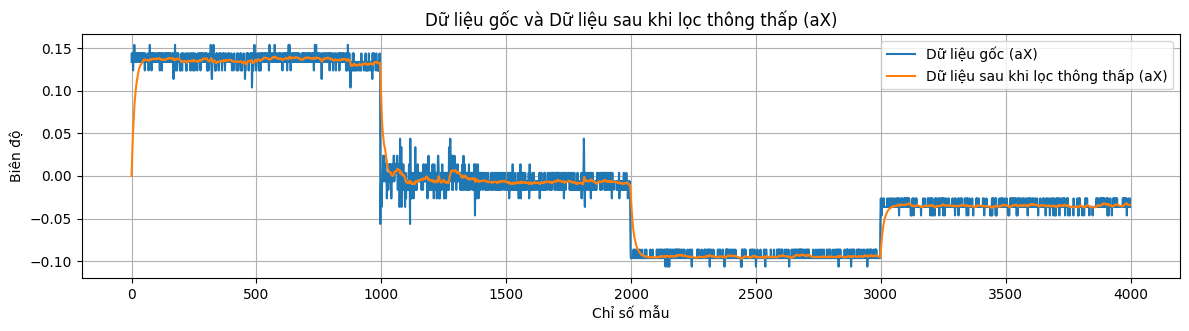

In [31]:
# Chuyển đổi dữ liệu thành mảng NumPy và lấy mẫu
aX_filtered = pd.to_numeric(df['aX'], errors='coerce').values
aX_filtered = np.nan_to_num(aX_filtered)
aX_filtered = aX_filtered[-3999:]

# Tính toán biến đổi Fourier 
frequencies_x= compute_fourier_transform(aX_filtered, fs)

# Lọc dữ liệu cho cả aZ và aY
y_low_pass_x = apply_low_pass_filter(aX_filtered, b_low, a_low)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu gốc và dữ liệu sau khi lọc cho aY
plt.subplot(2, 1, 2)
plt.plot(aX_filtered, label='Dữ liệu gốc (aX)')
plt.plot(y_low_pass_x, label='Dữ liệu sau khi lọc thông thấp (aX)')
plt.title('Dữ liệu gốc và Dữ liệu sau khi lọc thông thấp (aX)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Frequencies (gZ): [0.00000000e+00 1.00025006e-02 2.00050013e-02 ... 1.99649912e+01
 1.99749937e+01 1.99849962e+01]


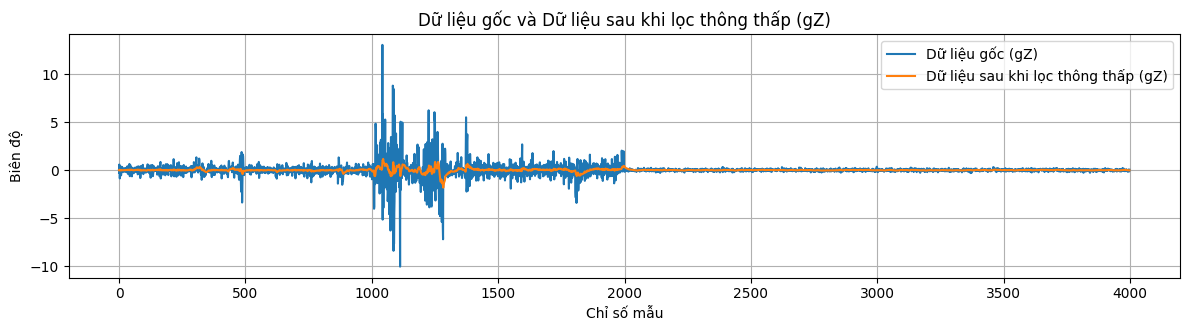

In [32]:
# Chuyển đổi dữ liệu thành mảng NumPy và lấy mẫu
gZ_filtered = pd.to_numeric(df['gZ'], errors='coerce').values
gZ_filtered = np.nan_to_num(gZ_filtered)
gZ_filtered = gZ_filtered[-3999:]

# Tính toán biến đổi Fourier cho gZ
frequencies_gz = compute_fourier_transform(gZ_filtered, fs)

# In kết quả để kiểm tra
print("Frequencies (gZ):", frequencies_gz)

# Lọc dữ liệu cho gZ bằng bộ lọc thông thấp
y_low_pass_gz = apply_low_pass_filter(gZ_filtered, b_low, a_low)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu gốc và dữ liệu sau khi lọc cho gZ
plt.subplot(2, 1, 1)
plt.plot(gZ_filtered, label='Dữ liệu gốc (gZ)')
plt.plot(y_low_pass_gz, label='Dữ liệu sau khi lọc thông thấp (gZ)')
plt.title('Dữ liệu gốc và Dữ liệu sau khi lọc thông thấp (gZ)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Frequencies (gY): [0.00000000e+00 1.00025006e-02 2.00050013e-02 ... 1.99649912e+01
 1.99749937e+01 1.99849962e+01]


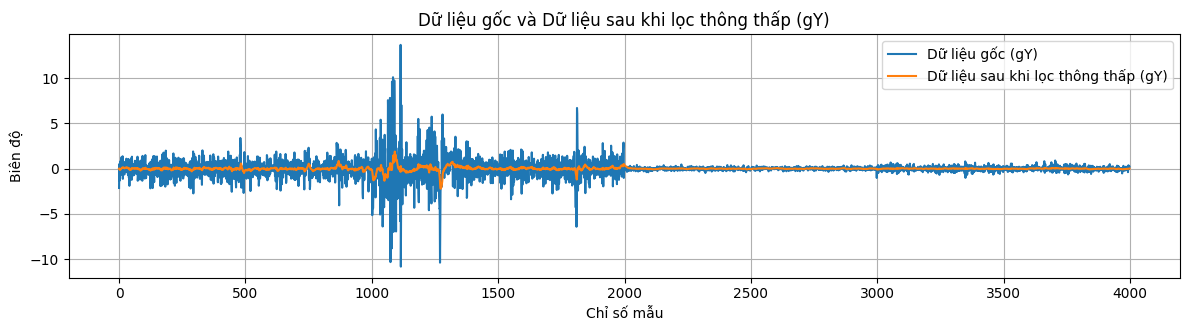

In [33]:
# Chuyển đổi dữ liệu thành mảng NumPy và lấy mẫu
gY_filtered = pd.to_numeric(df['gY'], errors='coerce').values
gY_filtered = np.nan_to_num(gY_filtered)
gY_filtered = gY_filtered[-3999:]

# Tính toán biến đổi Fourier cho gY
frequencies_gy= compute_fourier_transform(gY_filtered, fs)

# In kết quả để kiểm tra
print("Frequencies (gY):", frequencies_gy)

# Lọc dữ liệu cho gY bằng bộ lọc thông thấp
y_low_pass_gy = apply_low_pass_filter(gY_filtered, b_low, a_low)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu gốc và dữ liệu sau khi lọc cho gY
plt.subplot(2, 1, 1)
plt.plot(gY_filtered, label='Dữ liệu gốc (gY)')
plt.plot(y_low_pass_gy, label='Dữ liệu sau khi lọc thông thấp (gY)')
plt.title('Dữ liệu gốc và Dữ liệu sau khi lọc thông thấp (gY)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Frequencies (gX): [0.00000000e+00 1.00025006e-02 2.00050013e-02 ... 1.99649912e+01
 1.99749937e+01 1.99849962e+01]


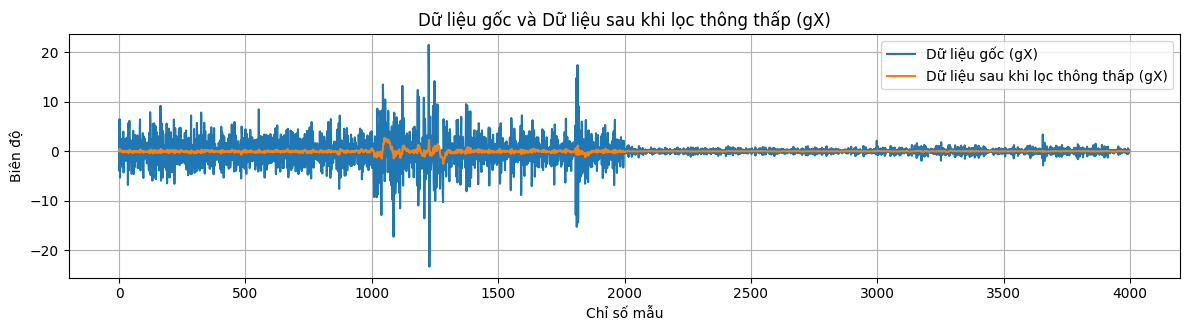

In [34]:
# Chuyển đổi dữ liệu thành mảng NumPy và lấy mẫu
gX_filtered = pd.to_numeric(df['gX'], errors='coerce').values
gX_filtered = np.nan_to_num(gX_filtered)
gX_filtered = gX_filtered[-3999:]

# Tính toán biến đổi Fourier cho gX
frequencies_gx = compute_fourier_transform(gX_filtered, fs)

# In kết quả để kiểm tra
print("Frequencies (gX):", frequencies_gx)

# Lọc dữ liệu cho gX bằng bộ lọc thông thấp
y_low_pass_gx = apply_low_pass_filter(gX_filtered, b_low, a_low)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu gốc và dữ liệu sau khi lọc cho gX
plt.subplot(2, 1, 1)
plt.plot(gX_filtered, label='Dữ liệu gốc (gX)')
plt.plot(y_low_pass_gx, label='Dữ liệu sau khi lọc thông thấp (gX)')
plt.title('Dữ liệu gốc và Dữ liệu sau khi lọc thông thấp (gX)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [35]:
# Thông số bộ lọc thông cao
fc_high = 0.1  # Tần số cắt của bộ lọc thông cao (Hz)
w0_high = 2 * np.pi * fc_high

# Tạo bộ lọc thông cao
num_high = [w0_high, 0]   # Hệ số tử
den_high = [1, w0_high]  # Hệ số mẫu số
highPass = signal.TransferFunction(num_high, den_high)

# Chuyển đổi sang dạng rời rạc
discreteHighPass = highPass.to_discrete(dt, method='gbt', alpha=0.5)

# Hiển thị các hệ số của bộ lọc thông cao rời rạc
b_high = discreteHighPass.num
a_high = discreteHighPass.den

print("Hệ số tử số (b) của bộ lọc thông cao:", b_high)
print("Hệ số mẫu số (a) của bộ lọc thông cao:", a_high)

Hệ số tử số (b) của bộ lọc thông cao: [ 0.62342218 -0.62342218]
Hệ số mẫu số (a) của bộ lọc thông cao: [ 1.         -0.98441445]


In [36]:
# Lọc dữ liệu bằng bộ lọc thông cao
def apply_high_pass_filter(data, b, a):
    y_high_pass = np.zeros(len(data))
    for i in range(1, len(data)):
        y_high_pass[i] = b[0] * data[i] + b[1] * data[i-1] - a[1] * y_high_pass[i-1]
    return y_high_pass

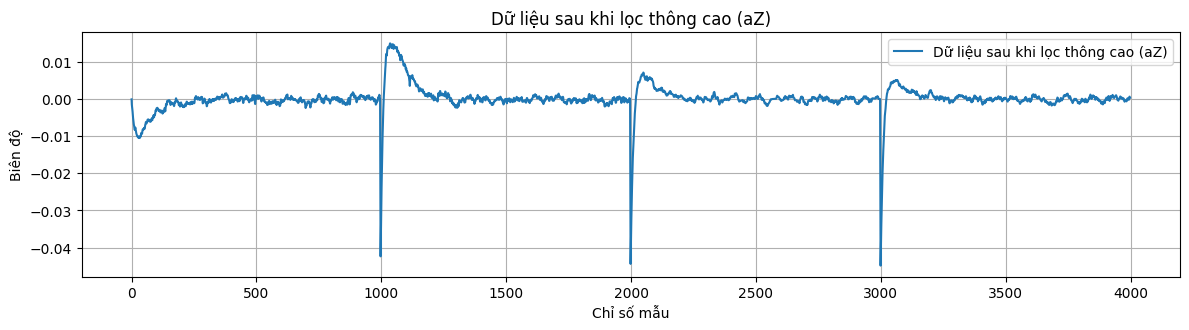

In [37]:
# Lọc dữ liệu cho aZ 
y_high_pass_z = apply_high_pass_filter(y_low_pass_z, b_high, a_high)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu sau khi lọc thông cao cho aZ
plt.subplot(2, 1, 1)
plt.plot(y_high_pass_z, label='Dữ liệu sau khi lọc thông cao (aZ)')
plt.title('Dữ liệu sau khi lọc thông cao (aZ)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

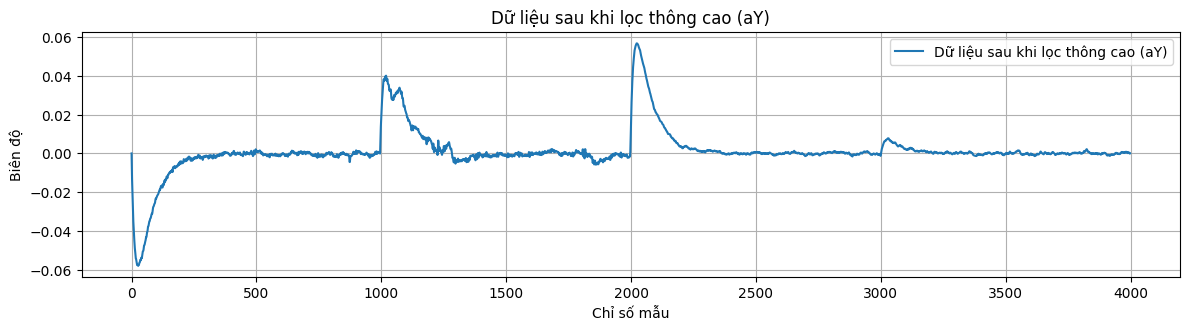

In [38]:
# Lọc dữ liệu cho aY
y_high_pass_y = apply_high_pass_filter(y_low_pass_y, b_high, a_high)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu sau khi lọc thông cao cho aY
plt.subplot(2, 1, 2)
plt.plot(y_high_pass_y, label='Dữ liệu sau khi lọc thông cao (aY)')
plt.title('Dữ liệu sau khi lọc thông cao (aY)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


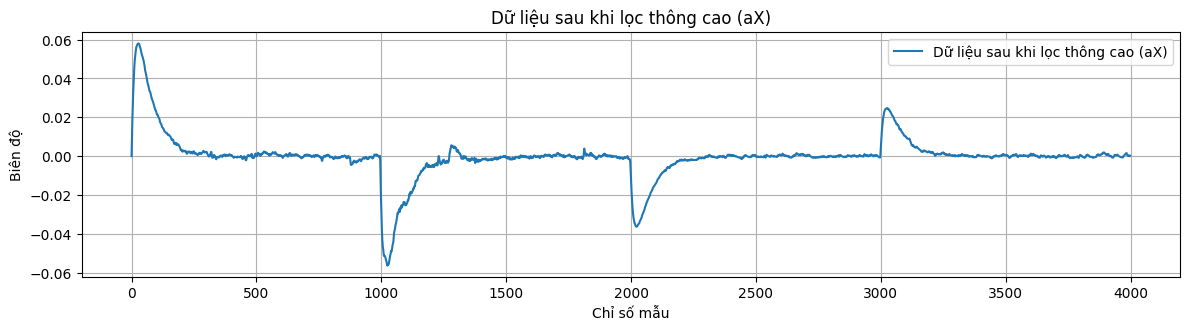

In [39]:
# Lọc dữ liệu cho aX
y_high_pass_x = apply_high_pass_filter(y_low_pass_x, b_high, a_high)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu sau khi lọc thông cao cho aY
plt.subplot(2, 1, 2)
plt.plot(y_high_pass_x, label='Dữ liệu sau khi lọc thông cao (aX)')
plt.title('Dữ liệu sau khi lọc thông cao (aX)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

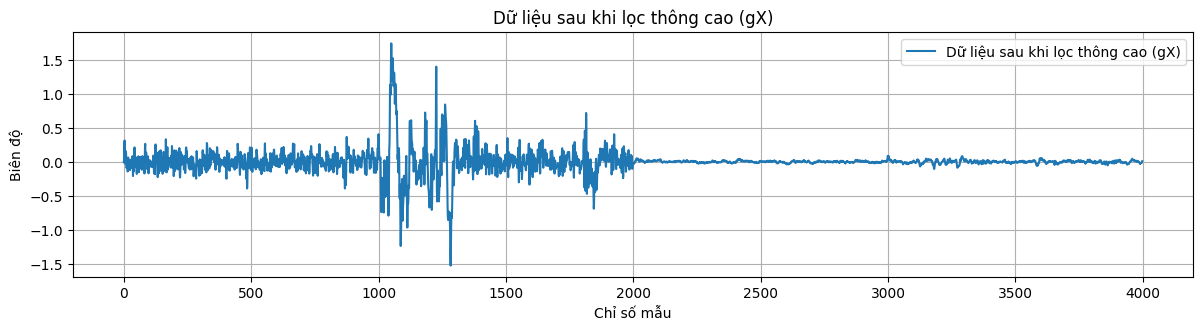

In [40]:
# Lọc dữ liệu cho gX
y_high_pass_gx = apply_high_pass_filter(y_low_pass_gx, b_high, a_high)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu sau khi lọc thông cao cho aY
plt.subplot(2, 1, 2)
plt.plot(y_high_pass_gx, label='Dữ liệu sau khi lọc thông cao (gX)')
plt.title('Dữ liệu sau khi lọc thông cao (gX)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

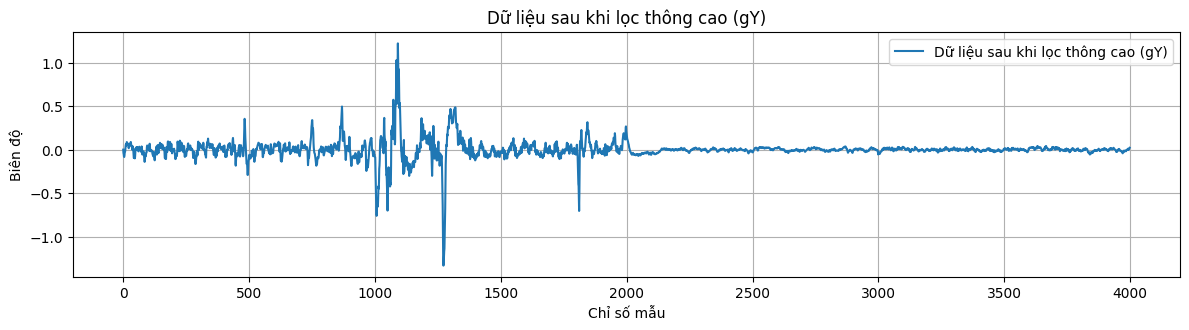

In [41]:
# Lọc dữ liệu cho gY
y_high_pass_gy = apply_high_pass_filter(y_low_pass_gy, b_high, a_high)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu sau khi lọc thông cao cho aY
plt.subplot(2, 1, 2)
plt.plot(y_high_pass_gy, label='Dữ liệu sau khi lọc thông cao (gY)')
plt.title('Dữ liệu sau khi lọc thông cao (gY)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

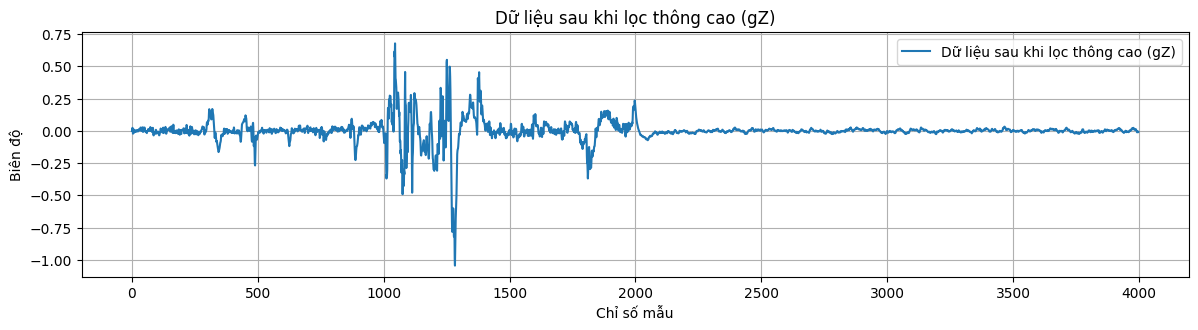

In [42]:
# Lọc dữ liệu cho gZ
y_high_pass_gz = apply_high_pass_filter(y_low_pass_gz, b_high, a_high)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Đồ thị dữ liệu sau khi lọc thông cao cho aY
plt.subplot(2, 1, 2)
plt.plot(y_high_pass_gz, label='Dữ liệu sau khi lọc thông cao (gZ)')
plt.title('Dữ liệu sau khi lọc thông cao (gZ)')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Biên độ')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [43]:
# Hàm để trích xuất các đặc trưng thống kê từ một đoạn dữ liệu
def extract_features(segment):
    mean_value = np.mean(segment)
    rms_value = np.sqrt(np.mean(segment**2))  
    std_dev = np.std(segment)
    max_value = np.max(segment)
    min_value = np.min(segment)
    return [rms_value, std_dev, max_value, min_value]

# Kích thước của đoạn dữ liệu
segment_size = 6

In [44]:
# Hàm để trích xuất các đặc trưng 
def extract_features_for_all_channels(segment):
    feature_aX = extract_features(segment['aX'])
    feature_aY = extract_features(segment['aY'])
    feature_aZ = extract_features(segment['aZ'])
    feature_gX = extract_features(segment['gX'])
    feature_gY = extract_features(segment['gY'])
    feature_gZ = extract_features(segment['gZ'])
    
    combined_features = feature_aX + feature_aY + feature_aZ + feature_gX + feature_gY + feature_gZ
    
    return combined_features

In [45]:
start_index = segment_size-3999
end_index = segment_size

segment = {
    'aX': y_high_pass_x[start_index:end_index],
    'aY': y_high_pass_y[start_index:end_index],
    'aZ': y_high_pass_z[start_index:end_index],
    'gX': y_high_pass_gx[start_index:end_index],
    'gY': y_high_pass_gy[start_index:end_index],
    'gZ': y_high_pass_gz[start_index:end_index]
}


In [46]:
# Tính toán đặc trưng từ dữ liệu mới
features_array = [extract_features_for_all_channels({
    'aX': y_high_pass_x[i:i + segment_size],
    'aY': y_high_pass_y[i:i + segment_size],
    'aZ': y_high_pass_z[i:i + segment_size],
    'gX': y_high_pass_gx[i:i + segment_size],
    'gY': y_high_pass_gy[i:i + segment_size],
    'gZ': y_high_pass_gz[i:i + segment_size]
}) for i in range(0, len(y_high_pass_x) - segment_size + 1, segment_size)]

# Tạo DataFrame từ các đặc trưng mới
features_df = pd.DataFrame(features_array, columns=['aX_rms', 'aX_std_dev', 'aX_max', 'aX_min',
                                                    'aY_rms', 'aY_std_dev', 'aY_max', 'aY_min',
                                                    'aZ_rms', 'aZ_std_dev', 'aZ_max', 'aZ_min',
                                                    'gX_rms', 'gX_std_dev', 'gX_max', 'gX_min',
                                                    'gY_rms', 'gY_std_dev', 'gY_max', 'gY_min',
                                                    'gZ_rms', 'gZ_std_dev', 'gZ_max', 'gZ_min'])

# Đọc dữ liệu 
try:
    old_features_df = pd.read_csv('F_Stop_Bth_Cleaned.csv')
    # Kết hợp dữ liệu cũ với dữ liệu mới
    combined_features_df = pd.concat([old_features_df, features_df], ignore_index=True)
except FileNotFoundError:
    # Nếu tệp CSV không tồn tại, chỉ cần sử dụng dữ liệu mới
    combined_features_df = features_df

# Lưu kết quả kết hợp vào tệp CSV
combined_features_df.to_csv('F_Stop_Bth_Cleaned.csv', index=False)

print("Dữ liệu đã được kết hợp và lưu vào tệp CSV.")


Dữ liệu đã được kết hợp và lưu vào tệp CSV.
